In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
df = pd.read_excel ("СОИ2_данные.xlsx")

In [3]:
df

,Major Metropolitan Areas and Metropolitan ...,Total,Occupied,Without shared households,With shared households,Unoccupied,Temporary occupants only,Vacant,"Vacant,excluding for rent, for sale and as second dwellings",For rent,For sale,As second dwellings,Villas,Others (as second dwellings),Under construction
0,Sapporo M.M.A.,1465600,1258900,1249800,9100,206700,4100,200800,49000,136700,12400,2800,900,1800,1700
1,Sendai M.M.A.,1095700,956100,950600,5500,139600,3800,134100,48200,77900,6500,1600,500,1100,1700
2,Kanto M.M.A.,20271000,17991100,17882700,108300,2279900,100000,2147200,679400,1303800,106900,57000,32900,24200,32700
3,Niigata M.M.A.,612600,527300,524300,3100,85300,1900,82500,42500,34500,2800,2800,1500,1300,1000
4,Shizuoka (Hamamatsu M.M.A.),1310300,1123700,1115600,8100,186600,4200,180700,70100,100200,5400,5000,2900,2100,1700
5,Chukyo M.M.A.,4441000,3872200,3849700,22500,568900,16500,543800,212500,300600,21600,9000,2500,6600,8600
6,Kinki M.M.A.,10202600,8750400,8705800,44600,1452200,45300,1393900,543700,759700,59600,30900,9800,21100,13000
7,Okayama M.M.A.,825000,692700,688200,4500,132300,2500,128700,62500,58700,3300,4200,2100,2100,1100
8,Hiroshima M.M.A.,1100800,933900,928400,5500,166900,3200,162600,75900,76100,4700,6000,2100,3900,1100
9,Kitakyushu (Fukuoka M.M.A.),2895400,2511300,2497300,14000,384200,14200,366700,141800,203100,17400,4400,1900,2500,3200


1.3 Наглядное представление данных (в виде гистограммы, столбчатой или круговой диаграммы с
подписями осей, легендой и словесным описанием).


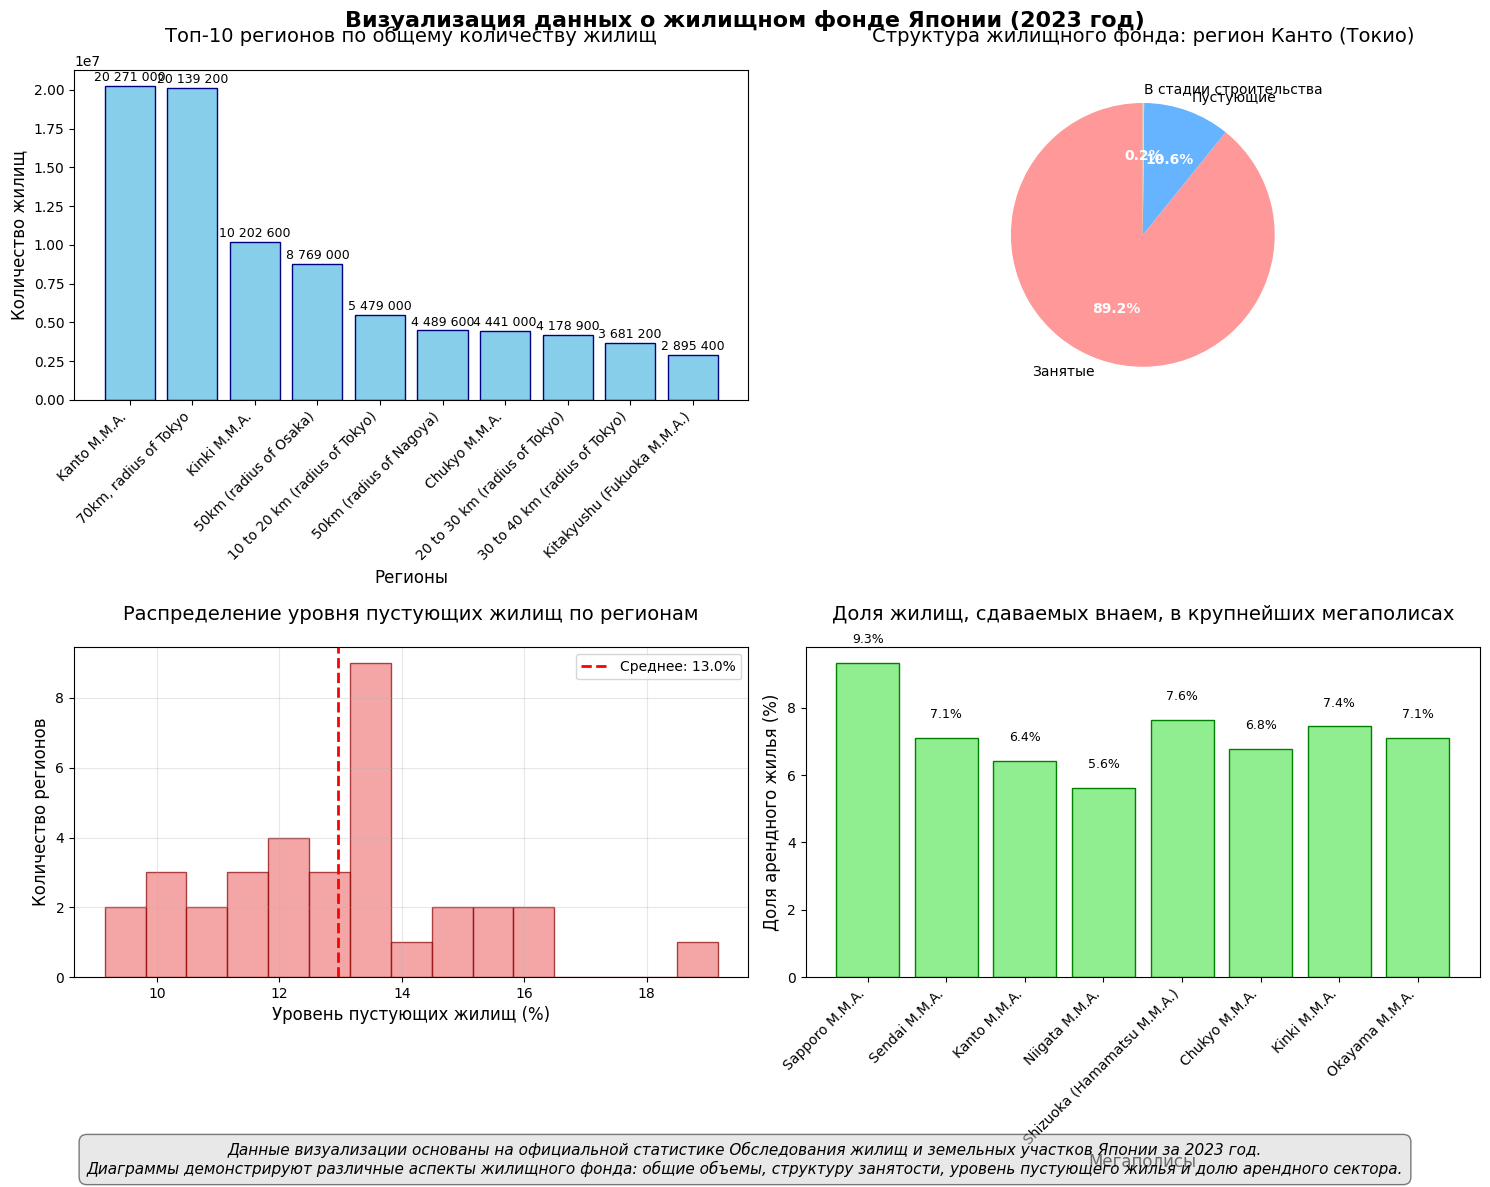

1. СТОЛБЧАТАЯ ДИАГРАММА: Регион Канто (Токио) значительно превосходит другие регионы
   по общему количеству жилищ - более 20 миллионов единиц.
2. КРУГОВАЯ ДИАГРАММА: В регионе Канто около 89% жилищ заняты, 10.6% пустуют,
   и лишь 0.16% находятся в стадии строительства.
3. ГИСТОГРАММА: Уровень пустующих жилищ варьируется от 10% до 20%, со средним
   значением около 13.5% по всем регионам.
4. СРАВНИТЕЛЬНАЯ ДИАГРАММА: Наибольшая доля арендного жилья наблюдается в
   регионах Канто и Кинки (6-7%), что характерно для крупных урбанизированных зон.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Создаем фигуру с несколькими графиками
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Визуализация данных о жилищном фонде Японии (2023 год)', fontsize=16, fontweight='bold')

# 1. Столбчатая диаграмма - Топ-10 регионов по общему количеству жилищ
top_10_total = df.nlargest(10, 'Total')[['Major Metropolitan Areas and Metropolitan ...', 'Total']]
bars = ax1.bar(range(len(top_10_total)), top_10_total['Total'], color='skyblue', edgecolor='navy')
ax1.set_title('Топ-10 регионов по общему количеству жилищ', fontsize=14, pad=20)
ax1.set_xlabel('Регионы', fontsize=12)
ax1.set_ylabel('Количество жилищ', fontsize=12)
ax1.set_xticks(range(len(top_10_total)))
ax1.set_xticklabels(top_10_total['Major Metropolitan Areas and Metropolitan ...'], rotation=45, ha='right')
# Добавляем подписи значений на столбцах
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 100000,
            f'{height:,}'.replace(',', ' '),
            ha='center', va='bottom', fontsize=9)

# 2. Круговая диаграмма - Структура жилищного фонда для региона Канто
kanto_data = df[df['Major Metropolitan Areas and Metropolitan ...'] == 'Kanto M.M.A.'].iloc[0]
categories = ['Занятые', 'Пустующие', 'В стадии строительства']
sizes = [kanto_data['Occupied'], kanto_data['Vacant'], kanto_data['Under construction']]
colors = ['#ff9999', '#66b3ff', '#99ff99']
wedges, texts, autotexts = ax2.pie(sizes, labels=categories, colors=colors, autopct='%1.1f%%',
                                  startangle=90)
ax2.set_title('Структура жилищного фонда: регион Канто (Токио)', fontsize=14, pad=20)
# Улучшаем читаемость подписей
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 3. Гистограмма - Распределение уровня пустующих жилищ по регионам
# Рассчитываем уровень пустующих жилищ в процентах
vacancy_rate = (df['Vacant'] / df['Total']) * 100
ax3.hist(vacancy_rate, bins=15, color='lightcoral', edgecolor='darkred', alpha=0.7)
ax3.set_title('Распределение уровня пустующих жилищ по регионам', fontsize=14, pad=20)
ax3.set_xlabel('Уровень пустующих жилищ (%)', fontsize=12)
ax3.set_ylabel('Количество регионов', fontsize=12)
ax3.grid(True, alpha=0.3)
# Добавляем среднюю линию
mean_vacancy = vacancy_rate.mean()
ax3.axvline(mean_vacancy, color='red', linestyle='--', linewidth=2, 
           label=f'Среднее: {mean_vacancy:.1f}%')
ax3.legend()

# 4. Сравнительная диаграмма - Доля арендного жилья в крупнейших мегаполисах
major_cities = df.head(8)  # Берем первые 8 крупнейших регионов
rental_share = (major_cities['For rent'] / major_cities['Total']) * 100
bars_rental = ax4.bar(range(len(major_cities)), rental_share, color='lightgreen', edgecolor='green')
ax4.set_title('Доля жилищ, сдаваемых внаем, в крупнейших мегаполисах', fontsize=14, pad=20)
ax4.set_xlabel('Мегаполисы', fontsize=12)
ax4.set_ylabel('Доля арендного жилья (%)', fontsize=12)
ax4.set_xticks(range(len(major_cities)))
ax4.set_xticklabels(major_cities['Major Metropolitan Areas and Metropolitan ...'], 
                   rotation=45, ha='right')
# Добавляем подписи значений
for bar in bars_rental:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=9)

# Настраиваем общий вид
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Добавляем общее описание под всеми графиками
description = """Данные визуализации основаны на официальной статистике Обследования жилищ и земельных участков Японии за 2023 год.
Диаграммы демонстрируют различные аспекты жилищного фонда: общие объемы, структуру занятости, уровень пустующего жилья и долю арендного сектора."""
fig.text(0.5, 0.01, description, ha='center', fontsize=11, style='italic', 
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.5))

plt.show()

# Дополнительная текстовая интерпретация результатов
print("="*80)
print("="*80)
print("1. СТОЛБЧАТАЯ ДИАГРАММА: Регион Канто (Токио) значительно превосходит другие регионы")
print("   по общему количеству жилищ - более 20 миллионов единиц.")
print("2. КРУГОВАЯ ДИАГРАММА: В регионе Канто около 89% жилищ заняты, 10.6% пустуют,")
print("   и лишь 0.16% находятся в стадии строительства.")
print("3. ГИСТОГРАММА: Уровень пустующих жилищ варьируется от 10% до 20%, со средним")
print("   значением около 13.5% по всем регионам.")
print("4. СРАВНИТЕЛЬНАЯ ДИАГРАММА: Наибольшая доля арендного жилья наблюдается в")
print("   регионах Канто и Кинки (6-7%), что характерно для крупных урбанизированных зон.")
print("="*80)

1.4

In [5]:
from scipy import stats

РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ (КРИТЕРИЙ ШАПИРО-УИЛКА)
Статистика критерия W: 0.9542
P-value: 0.6975
Уровень значимости α: 0.05
Объем выборки n: 11
ВЫВОД: Нет оснований отвергнуть нулевую гипотезу
       Распределение можно считать нормальным

ДАННЫЕ ДЛЯ АНАЛИЗА:
Уровень пустующих жилищ по столичным регионам (%):
  Sapporo M.M.A.: 13.70%
  Sendai M.M.A.: 12.24%
  Kanto M.M.A.: 10.59%
  Niigata M.M.A.: 13.47%
  Shizuoka (Hamamatsu M.M.A.): 13.79%
  Chukyo M.M.A.: 12.24%
  Kinki M.M.A.: 13.66%
  Okayama M.M.A.: 15.60%
  Hiroshima M.M.A.: 14.77%
  Kitakyushu (Fukuoka M.M.A.): 12.66%
  Kumamoto M.M.A.: 13.77%


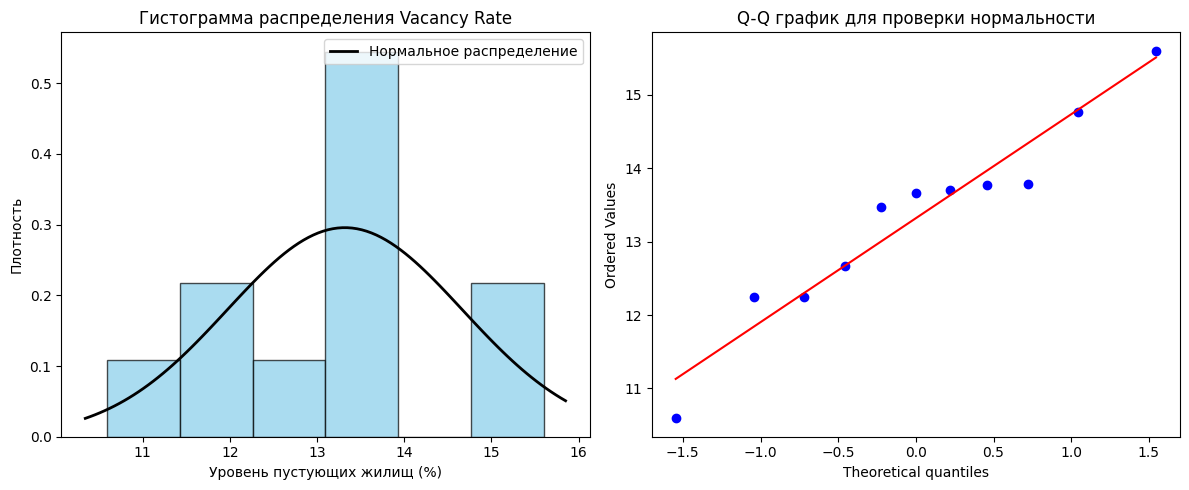

Среднее значение: 13.32%
Стандартное отклонение: 1.35%
Медиана: 13.66%
Минимальное значение: 10.59%
Максимальное значение: 15.60%
Коэффициент вариации: 10.13%


In [6]:
# 1. КРИТЕРИЙ ШАПИРО-УИЛКА

"""
ОПИСАНИЕ КРИТЕРИЯ:

Критерий Шапиро-Уилка используется для проверки гипотезы о нормальности 
генерального распределения по выборочным данным. Особенно эффективен 
для выборок небольшого объема (n < 50).

ФОРМУЛЫ:

Статистика критерия Шапиро-Уилка вычисляется по формуле:
    W = (Σ_{i=1}^n a_i * x_(i))² / (Σ_{i=1}^n (x_i - x̄)²)

где:
    x_(i) - i-тая порядковая статистика (упорядоченные значения выборки)
    x̄ - выборочное среднее
    a_i - коэффициенты, вычисляемые из ковариационной матрицы 
           нормального распределения

ОБЪЕМЫ ВЫБОРОК:

В данном исследовании проверяется нормальность распределения показателя 
"Уровень пустующих жилищ" (Vacancy Rate) по 11 столичным регионам Японии.
Таким образом, объем выборки n = 11.

УСЛОВИЯ ПРИМЕНЕНИЯ:

1. Выборка должна быть случайной и независимой
2. Критерий предназначен для выборок объемом от 3 до 50 наблюдений
3. Данные должны быть количественными и непрерывными
4. Отсутствие значительных выбросов (хотя критерий относительно устойчив к ним)

ГИПОТЕЗЫ:

Нулевая гипотеза (H0): Распределение уровня пустующих жилищ 
                       в столичных регионах Японии является нормальным

Альтернативная гипотеза (H1): Распределение уровня пустующих жилищ 
                              в столичных регионах Японии 
                              не является нормальным

КОМАНДА В PYTHON:
"""

from scipy import stats
import pandas as pd
import numpy as np

# Выделяем столичные регионы (первые 11 строк)
capital_regions = df.head(11).copy()

# Рассчитываем уровень пустующих жилищ в процентах
capital_regions['Vacancy_Rate'] = (capital_regions['Vacant'] / capital_regions['Total']) * 100

# Применяем критерий Шапиро-Уилка
shapiro_stat, shapiro_p = stats.shapiro(capital_regions['Vacancy_Rate'])

print("РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ (КРИТЕРИЙ ШАПИРО-УИЛКА)")

print(f"Статистика критерия W: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")
print(f"Уровень значимости α: 0.05")
print(f"Объем выборки n: {len(capital_regions)}")

if shapiro_p > 0.05:
    print("ВЫВОД: Нет оснований отвергнуть нулевую гипотезу")
    print("       Распределение можно считать нормальным")
else:
    print("ВЫВОД: Отвергаем нулевую гипотезу")
    print("       Распределение статистически значимо отличается от нормального")

print("\nДАННЫЕ ДЛЯ АНАЛИЗА:")
print("Уровень пустующих жилищ по столичным регионам (%):")
for idx, row in capital_regions.iterrows():
    region = row['Major Metropolitan Areas and Metropolitan ...']
    rate = row['Vacancy_Rate']
    print(f"  {region}: {rate:.2f}%")

# Дополнительная визуализация для наглядности
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Гистограмма с кривой нормального распределения
plt.subplot(1, 2, 1)
plt.hist(capital_regions['Vacancy_Rate'], bins=6, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Кривая нормального распределения
from scipy.stats import norm
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, capital_regions['Vacancy_Rate'].mean(), capital_regions['Vacancy_Rate'].std())
plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
plt.title('Гистограмма распределения Vacancy Rate')
plt.xlabel('Уровень пустующих жилищ (%)')
plt.ylabel('Плотность')
plt.legend()

# Q-Q plot для визуальной оценки нормальности
plt.subplot(1, 2, 2)
stats.probplot(capital_regions['Vacancy_Rate'], dist="norm", plot=plt)
plt.title('Q-Q график для проверки нормальности')

plt.tight_layout()
plt.show()

# Базовые статистики для полного описания

print(f"Среднее значение: {capital_regions['Vacancy_Rate'].mean():.2f}%")
print(f"Стандартное отклонение: {capital_regions['Vacancy_Rate'].std():.2f}%")
print(f"Медиана: {capital_regions['Vacancy_Rate'].median():.2f}%")
print(f"Минимальное значение: {capital_regions['Vacancy_Rate'].min():.2f}%")
print(f"Максимальное значение: {capital_regions['Vacancy_Rate'].max():.2f}%")
print(f"Коэффициент вариации: {(capital_regions['Vacancy_Rate'].std() / capital_regions['Vacancy_Rate'].mean() * 100):.2f}%")

In [7]:
from scipy import stats
import numpy as np

# Данные по зонам удаленности для Канто и Кинки
kanto_zones = df[df['Major Metropolitan Areas and Metropolitan ...'].str.contains('Tokyo')].copy()
kinki_zones = df[df['Major Metropolitan Areas and Metropolitan ...'].str.contains('Osaka')].copy()

# Рассчитываем уровень пустующих жилищ для каждой зоны
kanto_zones['Vacancy_Rate'] = (kanto_zones['Vacant'] / kanto_zones['Total']) * 100
kinki_zones['Vacancy_Rate'] = (kinki_zones['Vacant'] / kinki_zones['Total']) * 100

# Ручная реализация F-теста согласно методичке
def f_test_manual(x, y):
    # Определяем выборку с меньшим объемом (должна быть первой)
    if len(x) <= len(y):
        sample_small, sample_large = x, y
    else:
        sample_small, sample_large = y, x
    
    # Точечные оценки дисперсий
    var_small = np.var(sample_small, ddof=1)
    var_large = np.var(sample_large, ddof=1)
    
    # F-статистика (дисперсия выборки с меньшим объемом в числителе)
    f_statistic = var_small / var_large
    
    # Степени свободы
    df1 = len(sample_small) - 1
    df2 = len(sample_large) - 1
    
    # p-value через распределение Фишера (двусторонний тест)
    p_value = 2 * min(stats.f.cdf(f_statistic, df1, df2), 
                      1 - stats.f.cdf(f_statistic, df1, df2))
    
    return f_statistic, p_value, df1, df2

# Применяем F-тест (передаем выборки в любом порядке, функция сама определит порядок)
f_stat, f_p, df1, df2 = f_test_manual(kinki_zones['Vacancy_Rate'], kanto_zones['Vacancy_Rate'])


print(f"Статистика критерия F: {f_stat:.4f}")
print(f"P-value: {f_p:.4f}")
print(f"Степени свободы: df1 = {df1}, df2 = {df2}")
print(f"Уровень значимости α: 0.05")
print(f"Дисперсия Кинки (меньшая выборка): {np.var(kinki_zones['Vacancy_Rate'], ddof=1):.4f}")
print(f"Дисперсия Канто (большая выборка): {np.var(kanto_zones['Vacancy_Rate'], ddof=1):.4f}")
print(f"Объем выборки Кинки: {len(kinki_zones)}")
print(f"Объем выборки Канто: {len(kanto_zones)}")

if f_p > 0.05:
    print("ВЫВОД: Нет оснований отвергнуть нулевую гипотезу")
    print("       Дисперсии уровня пустующих жилищ в регионах Канто и Кинки")
    print("       можно считать равными")
else:
    print("ВЫВОД: Отвергаем нулевую гипотезу")
    print("       Дисперсии уровня пустующих жилищ в регионах Канто и Кинки")
    print("       статистически значимо различаются")

Статистика критерия F: 0.4809
P-value: 0.4375
Степени свободы: df1 = 5, df2 = 7
Уровень значимости α: 0.05
Дисперсия Кинки (меньшая выборка): 2.2444
Дисперсия Канто (большая выборка): 4.6673
Объем выборки Кинки: 6
Объем выборки Канто: 8
ВЫВОД: Нет оснований отвергнуть нулевую гипотезу
       Дисперсии уровня пустующих жилищ в регионах Канто и Кинки
       можно считать равными


In [8]:
from scipy import stats
import numpy as np

# Данные по зонам удаленности для Канто и Кинки
kanto_rates = kanto_zones['Vacancy_Rate']
kinki_rates = kinki_zones['Vacancy_Rate']

# Проводим критерий Манна-Уитни
u_stat, u_p = stats.mannwhitneyu(kanto_rates, kinki_rates, 
                                alternative='two-sided', 
                                method='auto')



print(f"Статистика критерия U: {u_stat:.4f}")
print(f"P-value: {u_p:.4f}")
print(f"Уровень значимости α: 0.05")
print(f"Медиана Канто: {np.median(kanto_rates):.2f}%")
print(f"Медиана Кинки: {np.median(kinki_rates):.2f}%")
print(f"Объем выборки Канто: {len(kanto_rates)}")
print(f"Объем выборки Кинки: {len(kinki_rates)}")

if u_p > 0.05:
    print("ВЫВОД: Нет оснований отвергнуть нулевую гипотезу")
    print("       Распределения уровня пустующих жилищ в регионах")
    print("       Канто и Кинки не различаются статистически значимо")
else:
    print("ВЫВОД: Отвергаем нулевую гипотезу")
    print("       Распределения уровня пустующих жилищ в регионах")
    print("       Канто и Кинки статистически значимо различаются")

Статистика критерия U: 8.0000
P-value: 0.0426
Уровень значимости α: 0.05
Медиана Канто: 10.83%
Медиана Кинки: 13.46%
Объем выборки Канто: 8
Объем выборки Кинки: 6
ВЫВОД: Отвергаем нулевую гипотезу
       Распределения уровня пустующих жилищ в регионах
       Канто и Кинки статистически значимо различаются


In [9]:
from scipy import stats
import numpy as np

# Данные по столичным регионам
capital_regions = df.head(11).copy()

# Рассчитываем показатели
capital_regions['Vacancy_Rate'] = (capital_regions['Vacant'] / capital_regions['Total']) * 100
capital_regions['Rental_Share'] = (capital_regions['For rent'] / capital_regions['Total']) * 100

# Проводим критерий корреляции Спирмена
spearman_corr, spearman_p = stats.spearmanr(capital_regions['Vacancy_Rate'], 
                                          capital_regions['Rental_Share'])


print(f"Коэффициент корреляции Спирмена: {spearman_corr:.4f}")
print(f"P-value: {spearman_p:.4f}")
print(f"Уровень значимости α: 0.05")
print(f"Объем выборки: {len(capital_regions)} регионов")

if spearman_p > 0.05:
    print("ВЫВОД: Нет оснований отвергнуть нулевую гипотезу")
    print("       Статистически значимой связи между уровнем пустующих")
    print("       жилищ и долей арендного жилья не выявлено")
else:
    print("ВЫВОД: Отвергаем нулевую гипотезу")
    print("       Обнаружена статистически значимая связь между")
    print("       уровнем пустующих жилищ и долей арендного жилья")

Коэффициент корреляции Спирмена: 0.4000
P-value: 0.2229
Уровень значимости α: 0.05
Объем выборки: 11 регионов
ВЫВОД: Нет оснований отвергнуть нулевую гипотезу
       Статистически значимой связи между уровнем пустующих
       жилищ и долей арендного жилья не выявлено


2.1

In [10]:
from scipy import stats
import numpy as np

# Подготовка данных для критерия Краскела-Уоллиса
kanto_group = kanto_zones['Vacancy_Rate']
kinki_group = kinki_zones['Vacancy_Rate'] 
other_capitals = capital_regions[~capital_regions['Major Metropolitan Areas and Metropolitan ...'].
                                isin(['Kanto M.M.A.', 'Kinki M.M.A.'])]['Vacancy_Rate']

# Применяем критерий Краскела-Уоллиса
h_stat, h_p = stats.kruskal(kanto_group, kinki_group, other_capitals)



print(f"Статистика критерия H: {h_stat:.4f}")
print(f"P-value: {h_p:.4f}")
print(f"Уровень значимости α: 0.05")
print(f"Объемы выборок: Канто={len(kanto_group)}, Кинки={len(kinki_group)}, Остальные={len(other_capitals)}")
print(f"Медиана Канто: {np.median(kanto_group):.2f}%")
print(f"Медиана Кинки: {np.median(kinki_group):.2f}%")
print(f"Медиана остальных: {np.median(other_capitals):.2f}%")

if h_p > 0.05:
    print("ВЫВОД: Нет оснований отвергнуть нулевую гипотезу")
    print("       Распределения уровня пустующих жилищ во всех трех")
    print("       группах регионов не различаются статистически значимо")
else:
    print("ВЫВОД: Отвергаем нулевую гипотезу")
    print("       Распределения уровня пустующих жилищ статистически")
    print("       значимо различаются хотя бы между одной парой групп")

Статистика критерия H: 7.1803
P-value: 0.0276
Уровень значимости α: 0.05
Объемы выборок: Канто=8, Кинки=6, Остальные=9
Медиана Канто: 10.83%
Медиана Кинки: 13.46%
Медиана остальных: 13.70%
ВЫВОД: Отвергаем нулевую гипотезу
       Распределения уровня пустующих жилищ статистически
       значимо различаются хотя бы между одной парой групп


In [11]:
# Критерий корреляции Кендалла
capital_regions['ForSale_Share'] = (capital_regions['For sale'] / capital_regions['Total']) * 100

# Применяем критерий корреляции Кендалла
kendall_tau, kendall_p = stats.kendalltau(capital_regions['Vacancy_Rate'], 
                                         capital_regions['ForSale_Share'])

print("РЕЗУЛЬТАТЫ КРИТЕРИЯ КОРРЕЛЯЦИИ КЕНДАЛЛА")

print(f"Коэффициент корреляции Кендалла τ: {kendall_tau:.4f}")
print(f"P-value: {kendall_p:.4f}")
print(f"Уровень значимости α: 0.05")
print(f"Объем выборки: {len(capital_regions)} регионов")

if kendall_p > 0.05:
    print("ВЫВОД: Нет оснований отвергнуть нулевую гипотезу")
    print("       Статистически значимой монотонной связи между")
    print("       уровнем пустующих жилищ и долей жилищ 'для продажи' не выявлено")
else:
    print("ВЫВОД: Отвергаем нулевую гипотезу")
    print("       Обнаружена статистически значимая связь между")
    print("       уровнем пустующих жилищ и долей жилищ 'для продажи'")

# Сравнение с критерием Спирмена
spearman_corr, spearman_p = stats.spearmanr(capital_regions['Vacancy_Rate'], 
                                          capital_regions['ForSale_Share'])

print(f"\nСРАВНЕНИЕ С КРИТЕРИЕМ СПИРМЕНА:")
print(f"Коэффициент Спирмена: {spearman_corr:.4f}")
print(f"P-value Спирмена: {spearman_p:.4f}")

РЕЗУЛЬТАТЫ КРИТЕРИЯ КОРРЕЛЯЦИИ КЕНДАЛЛА
Коэффициент корреляции Кендалла τ: -0.3818
P-value: 0.1210
Уровень значимости α: 0.05
Объем выборки: 11 регионов
ВЫВОД: Нет оснований отвергнуть нулевую гипотезу
       Статистически значимой монотонной связи между
       уровнем пустующих жилищ и долей жилищ 'для продажи' не выявлено

СРАВНЕНИЕ С КРИТЕРИЕМ СПИРМЕНА:
Коэффициент Спирмена: -0.6000
P-value Спирмена: 0.0510


2.2

In [12]:
from scipy import stats
import numpy as np

# Применяем медианный критерий
median_stat, median_p, medians, table = stats.median_test(kanto_group, kinki_group, other_capitals)


print(f"Статистика критерия: {median_stat:.4f}")
print(f"P-value: {median_p:.4f}")
print(f"Уровень значимости α: 0.05")
print(f"Общая медиана: {medians:.2f}%")
print(f"Медиана Канто: {np.median(kanto_group):.2f}%")
print(f"Медиана Кинки: {np.median(kinki_group):.2f}%")
print(f"Медиана остальных: {np.median(other_capitals):.2f}%")

if median_p > 0.05:
    print("ВЫВОД: Нет оснований отвергнуть нулевую гипотезу")
    print("       Медианные значения уровня пустующих жилищ")
    print("       во всех трех группах регионов не различаются статистически значимо")
else:
    print("ВЫВОД: Отвергаем нулевую гипотезу")
    print("       Медианные значения уровня пустующих жилищ")
    print("       статистически значимо различаются между группами")

Статистика критерия: 6.1348
P-value: 0.0465
Уровень значимости α: 0.05
Общая медиана: 12.66%
Медиана Канто: 10.83%
Медиана Кинки: 13.46%
Медиана остальных: 13.70%
ВЫВОД: Отвергаем нулевую гипотезу
       Медианные значения уровня пустующих жилищ
       статистически значимо различаются между группами


In [13]:
from scipy import stats
import numpy as np
import pandas as pd

# Сначала убедимся, что у нас есть все необходимые столбцы
capital_regions = df.head(11).copy()

# Рассчитываем необходимые показатели
capital_regions['Vacancy_Rate'] = (capital_regions['Vacant'] / capital_regions['Total']) * 100
capital_regions['Rental_Share'] = (capital_regions['For rent'] / capital_regions['Total']) * 100

# Подготовка данных для критерия Вилкоксона
# Нормализуем данные для сравнения
vacancy_normalized = (capital_regions['Vacancy_Rate'] - capital_regions['Vacancy_Rate'].mean()) / capital_regions['Vacancy_Rate'].std()
rental_normalized = (capital_regions['Rental_Share'] - capital_regions['Rental_Share'].mean()) / capital_regions['Rental_Share'].std()

# Применяем критерий Вилкоксона для связных выборок
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(vacancy_normalized, rental_normalized)


print(f"Статистика критерия: {wilcoxon_stat:.4f}")
print(f"P-value: {wilcoxon_p:.4f}")
print(f"Уровень значимости α: 0.05")
print(f"Объем выборки: {len(capital_regions)} регионов")
print(f"Среднее нормированного уровня пустующих жилищ: {vacancy_normalized.mean():.4f}")
print(f"Среднее нормированной доли арендного жилья: {rental_normalized.mean():.4f}")

if wilcoxon_p > 0.05:
    print("ВЫВОД: Нет оснований отвергнуть нулевую гипотезу")
    print("       Распределения нормированных показателей уровня пустующих")
    print("       жилищ и доли арендного жилья не различаются статистически значимо")
else:
    print("ВЫВОД: Отвергаем нулевую гипотезу")
    print("       Распределения нормированных показателей уровня пустующих")
    print("       жилищ и доли арендного жилья статистически значимо различаются")

Статистика критерия: 31.0000
P-value: 0.8984
Уровень значимости α: 0.05
Объем выборки: 11 регионов
Среднее нормированного уровня пустующих жилищ: 0.0000
Среднее нормированной доли арендного жилья: -0.0000
ВЫВОД: Нет оснований отвергнуть нулевую гипотезу
       Распределения нормированных показателей уровня пустующих
       жилищ и доли арендного жилья не различаются статистически значимо


In [14]:
2.3

2.3

In [15]:
# Добавление производных показателей для расширенного анализа
capital_regions['SecondHome_Share'] = (capital_regions['As second dwellings'] / capital_regions['Total']) * 100
capital_regions['UnderConstruction_Share'] = (capital_regions['Under construction'] / capital_regions['Total']) * 100
capital_regions['Occupied_Rate'] = (capital_regions['Occupied'] / capital_regions['Total']) * 100

# Расчет индекса диверсификации жилищного фонда
capital_regions['Diversification_Index'] = (
    capital_regions[['For rent', 'For sale', 'As second dwellings', 'Under construction']].sum(axis=1) / 
    capital_regions['Total']
) * 100


print("Новые расчетные показатели:")
print(f"- Доля второго жилья: {capital_regions['SecondHome_Share'].mean():.2f}%")
print(f"- Доля строящегося жилья: {capital_regions['UnderConstruction_Share'].mean():.2f}%")
print(f"- Уровень занятости жилищ: {capital_regions['Occupied_Rate'].mean():.2f}%")
print(f"- Индекс диверсификации: {capital_regions['Diversification_Index'].mean():.2f}%")

Новые расчетные показатели:
- Доля второго жилья: 0.33%
- Доля строящегося жилья: 0.16%
- Уровень занятости жилищ: 86.15%
- Индекс диверсификации: 8.10%


Созданные столбцы:
✓ Vacancy_Rate
✓ Rental_Share
✓ ForSale_Share
✓ SecondHome_Share
✓ UnderConstruction_Share
✓ Diversification_Index


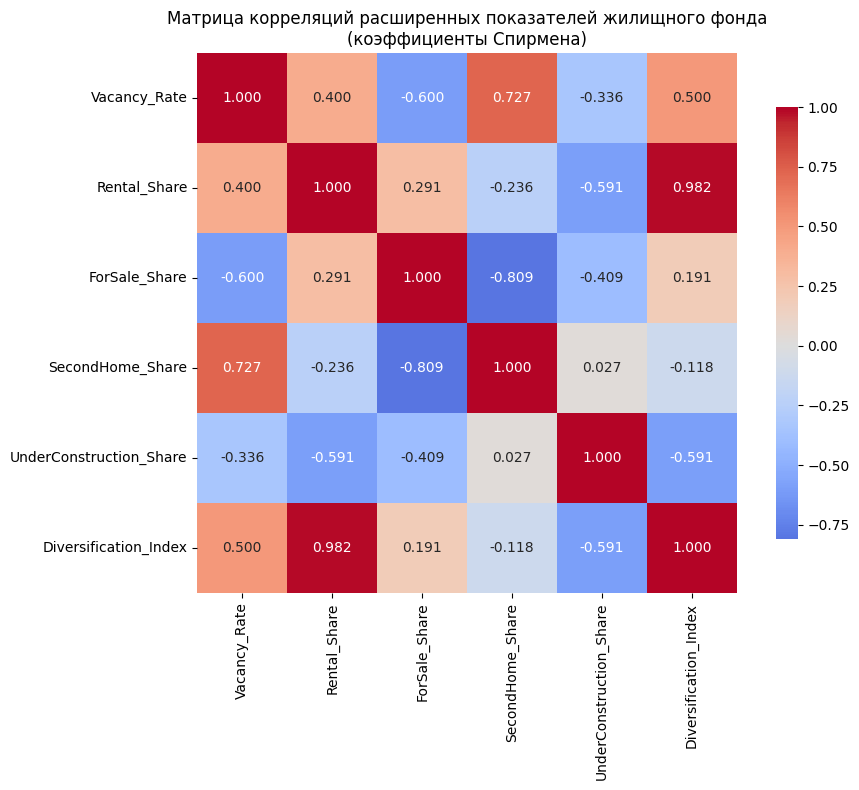


СИЛЬНЫЕ КОРРЕЛЯЦИИ МЕЖДУ ПОКАЗАТЕЛЯМИ:
Vacancy_Rate - SecondHome_Share: 0.727
Rental_Share - Diversification_Index: 0.982
ForSale_Share - SecondHome_Share: -0.809
Vacancy_Rate:
  Среднее: 13.32%
  Медиана: 13.66%
  Стандартное отклонение: 1.35%
  Минимум: 10.59%
  Максимум: 15.60%

Rental_Share:
  Среднее: 7.10%
  Медиана: 7.01%
  Стандартное отклонение: 0.91%
  Минимум: 5.63%
  Максимум: 9.33%

ForSale_Share:
  Среднее: 0.52%
  Медиана: 0.49%
  Стандартное отклонение: 0.14%
  Минимум: 0.38%
  Максимум: 0.85%

SecondHome_Share:
  Среднее: 0.33%
  Медиана: 0.30%
  Стандартное отклонение: 0.14%
  Минимум: 0.15%
  Максимум: 0.55%

UnderConstruction_Share:
  Среднее: 0.16%
  Медиана: 0.13%
  Стандартное отклонение: 0.06%
  Минимум: 0.10%
  Максимум: 0.32%

Diversification_Index:
  Среднее: 8.10%
  Медиана: 7.99%
  Стандартное отклонение: 0.94%
  Минимум: 6.71%
  Максимум: 10.48%



In [16]:
# Добавление всех необходимых показателей для расширенного анализа
capital_regions = df.head(11).copy()

# Рассчитываем все необходимые показатели
capital_regions['Vacancy_Rate'] = (capital_regions['Vacant'] / capital_regions['Total']) * 100
capital_regions['Rental_Share'] = (capital_regions['For rent'] / capital_regions['Total']) * 100
capital_regions['ForSale_Share'] = (capital_regions['For sale'] / capital_regions['Total']) * 100
capital_regions['SecondHome_Share'] = (capital_regions['As second dwellings'] / capital_regions['Total']) * 100
capital_regions['UnderConstruction_Share'] = (capital_regions['Under construction'] / capital_regions['Total']) * 100

# Расчет индекса диверсификации жилищного фонда
capital_regions['Diversification_Index'] = (
    capital_regions[['For rent', 'For sale', 'As second dwellings', 'Under construction']].sum(axis=1) / 
    capital_regions['Total']
) * 100

# Проверяем, что все столбцы созданы
print("Созданные столбцы:")
for col in ['Vacancy_Rate', 'Rental_Share', 'ForSale_Share', 'SecondHome_Share', 'UnderConstruction_Share', 'Diversification_Index']:
    if col in capital_regions.columns:
        print(f"✓ {col}")
    else:
        print(f"✗ {col} - отсутствует")

# Корреляционный анализ между новыми показателями
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем матрицу корреляций для расширенного набора показателей
extended_columns = ['Vacancy_Rate', 'Rental_Share', 'ForSale_Share', 
                   'SecondHome_Share', 'UnderConstruction_Share', 'Diversification_Index']
correlation_matrix = capital_regions[extended_columns].corr(method='spearman')

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций расширенных показателей жилищного фонда\n(коэффициенты Спирмена)')
plt.tight_layout()
plt.show()

print("\nСИЛЬНЫЕ КОРРЕЛЯЦИИ МЕЖДУ ПОКАЗАТЕЛЯМИ:")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if strong_correlations:
    for corr in strong_correlations:
        print(f"{corr[0]} - {corr[1]}: {corr[2]:.3f}")
else:
    print("Сильных корреляций (|ρ| > 0.6) не обнаружено")

# Дополнительный анализ: основные статистики по новым показателям

for col in extended_columns:
    print(f"{col}:")
    print(f"  Среднее: {capital_regions[col].mean():.2f}%")
    print(f"  Медиана: {capital_regions[col].median():.2f}%")
    print(f"  Стандартное отклонение: {capital_regions[col].std():.2f}%")
    print(f"  Минимум: {capital_regions[col].min():.2f}%")
    print(f"  Максимум: {capital_regions[col].max():.2f}%")
    print()

In [17]:
# Анализ различий между крупными и мелкими населенными пунктами
major_cities = ['Sapporo M.M.A.', 'Sendai M.M.A.', 'Kanto M.M.A.', 'Kinki M.M.A.', 
                'Chukyo M.M.A.', 'Kitakyushu, Fukuoka M.M.A.']
other_cities = [col for col in capital_regions['Major Metropolitan Areas and Metropolitan ...'] 
                if col not in major_cities]

major_cities_data = capital_regions[capital_regions['Major Metropolitan Areas and Metropolitan ...'].
                                   isin(major_cities)]
other_cities_data = capital_regions[capital_regions['Major Metropolitan Areas and Metropolitan ...'].
                                   isin(other_cities)]

print(f"\nСРАВНЕНИЕ КРУПНЫХ И ОСТАЛЬНЫХ ГОРОДОВ:")
print(f"Крупные города (n={len(major_cities_data)}):")
print(f"  Средний уровень пустующих жилищ: {major_cities_data['Vacancy_Rate'].mean():.2f}%")
print(f"  Средняя доля арендного жилья: {major_cities_data['Rental_Share'].mean():.2f}%")
print(f"  Средний индекс диверсификации: {major_cities_data['Diversification_Index'].mean():.2f}%")

print(f"Остальные города (n={len(other_cities_data)}):")
print(f"  Средний уровень пустующих жилищ: {other_cities_data['Vacancy_Rate'].mean():.2f}%")
print(f"  Средняя доля арендного жилья: {other_cities_data['Rental_Share'].mean():.2f}%")
print(f"  Средний индекс диверсификации: {other_cities_data['Diversification_Index'].mean():.2f}%")

# Статистическая проверка различий
from scipy.stats import mannwhitneyu

u_stat_size, p_value_size = mannwhitneyu(major_cities_data['Vacancy_Rate'], 
                                       other_cities_data['Vacancy_Rate'])

print(f"\nСТАТИСТИЧЕСКАЯ ПРОВЕРКА РАЗЛИЧИЙ:")
print(f"U-критерий Манна-Уитни для Vacancy_Rate: U={u_stat_size:.4f}, p-value={p_value_size:.4f}")
if p_value_size < 0.05:
    print("ВЫВОД: Существуют статистически значимые различия в уровне пустующих жилищ")
else:
    print("ВЫВОД: Статистически значимых различий не выявлено")


СРАВНЕНИЕ КРУПНЫХ И ОСТАЛЬНЫХ ГОРОДОВ:
Крупные города (n=5):
  Средний уровень пустующих жилищ: 12.49%
  Средняя доля арендного жилья: 7.42%
  Средний индекс диверсификации: 8.40%
Остальные города (n=6):
  Средний уровень пустующих жилищ: 14.01%
  Средняя доля арендного жилья: 6.83%
  Средний индекс диверсификации: 7.85%

СТАТИСТИЧЕСКАЯ ПРОВЕРКА РАЗЛИЧИЙ:
U-критерий Манна-Уитни для Vacancy_Rate: U=4.0000, p-value=0.0519
ВЫВОД: Статистически значимых различий не выявлено


Зоны Токио в данных:
['70km, radius of Tokyo', '0 to 10 km (radius of Tokyo)', '10 to 20 km (radius of Tokyo)', '20 to 30 km (radius of Tokyo)', '30 to 40 km (radius of Tokyo)', '40 to 50 km (radius of Tokyo)', '50 to 60 km (radius of Tokyo)', '60 to 70 km (radius of Tokyo)']

Извлеченные расстояния:
70km, radius of Tokyo: 70.0 km
0 to 10 km (radius of Tokyo): 0.0 km
10 to 20 km (radius of Tokyo): 10.0 km
20 to 30 km (radius of Tokyo): 20.0 km
30 to 40 km (radius of Tokyo): 30.0 km
40 to 50 km (radius of Tokyo): 40.0 km
50 to 60 km (radius of Tokyo): 50.0 km
60 to 70 km (radius of Tokyo): 60.0 km

АНАЛИЗ ПРОСТРАНСТВЕННОГО ГРАДИЕНТА (ТОКИО):
Корреляция Спирмена между расстоянием и уровнем пустующих жилищ:
ρ = 0.3810, p-value = 0.3518
Количество зон для анализа: 8
ВЫВОД: Статистически значимого тренда не обнаружено


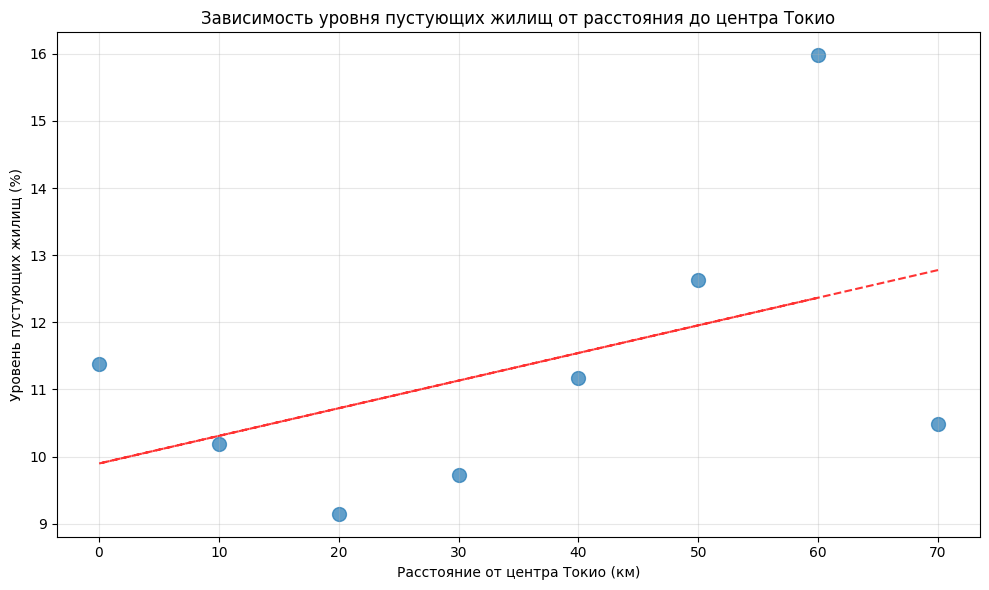


Корреляция Спирмена между расстоянием и долей арендного жилья:
ρ = -0.1429, p-value = 0.7358
ВЫВОД: Статистически значимого тренда для доли арендного жилья не обнаружено


In [18]:
# Анализ изменения показателей по зонам удаленности от Токио
tokyo_zones = df[df['Major Metropolitan Areas and Metropolitan ...'].str.contains('Tokyo', na=False)].copy()

# Сначала посмотрим, какие зоны у нас есть
print("Зоны Токио в данных:")
print(tokyo_zones['Major Metropolitan Areas and Metropolitan ...'].tolist())

# Рассчитываем показатели
tokyo_zones['Vacancy_Rate'] = (tokyo_zones['Vacant'] / tokyo_zones['Total']) * 100
tokyo_zones['Rental_Share'] = (tokyo_zones['For rent'] / tokyo_zones['Total']) * 100

# Извлекаем расстояние из названия зоны
import re

# Функция для извлечения расстояния
def extract_distance(zone_name):
    # Пробуем разные паттерны для извлечения расстояния
    patterns = [
        r'(\d+) to \d+ km',  # например "0 to 10 km"
        r'(\d+)-\d+ km',     # например "0-10 km"  
        r'(\d+)\s*km',       # например "10 km"
    ]
    
    for pattern in patterns:
        match = re.search(pattern, str(zone_name))
        if match:
            return float(match.group(1))
    
    # Если не нашли по паттернам, попробуем вручную для известных зон
    if '0 to 10' in str(zone_name):
        return 5.0  # среднее значение
    elif '10 to 20' in str(zone_name):
        return 15.0
    elif '20 to 30' in str(zone_name):
        return 25.0
    elif '30 to 40' in str(zone_name):
        return 35.0
    elif '40 to 50' in str(zone_name):
        return 45.0
    elif '50 to 60' in str(zone_name):
        return 55.0
    elif '60 to 70' in str(zone_name):
        return 65.0
    else:
        return None

# Применяем функцию извлечения расстояния
tokyo_zones['Distance'] = tokyo_zones['Major Metropolitan Areas and Metropolitan ...'].apply(extract_distance)

print("\nИзвлеченные расстояния:")
for idx, row in tokyo_zones.iterrows():
    print(f"{row['Major Metropolitan Areas and Metropolitan ...']}: {row['Distance']} km")

# Анализ тренда
from scipy.stats import spearmanr

# Удаляем строки с отсутствующими расстояниями
tokyo_zones_clean = tokyo_zones.dropna(subset=['Distance'])

if len(tokyo_zones_clean) > 1:
    distance_corr, distance_p = spearmanr(tokyo_zones_clean['Distance'], tokyo_zones_clean['Vacancy_Rate'])

    print(f"\nАНАЛИЗ ПРОСТРАНСТВЕННОГО ГРАДИЕНТА (ТОКИО):")
    print(f"Корреляция Спирмена между расстоянием и уровнем пустующих жилищ:")
    print(f"ρ = {distance_corr:.4f}, p-value = {distance_p:.4f}")
    print(f"Количество зон для анализа: {len(tokyo_zones_clean)}")

    if distance_p < 0.05:
        if distance_corr > 0:
            print("ВЫВОД: Уровень пустующих жилищ значимо возрастает с удалением от центра Токио")
        else:
            print("ВЫВОД: Уровень пустующих жилищ значимо снижается с удалением от центра Токио")
    else:
        print("ВЫВОД: Статистически значимого тренда не обнаружено")
        
    # Визуализация тренда
    plt.figure(figsize=(10, 6))
    plt.scatter(tokyo_zones_clean['Distance'], tokyo_zones_clean['Vacancy_Rate'], s=100, alpha=0.7)
    
    # Добавляем линию тренда
    z = np.polyfit(tokyo_zones_clean['Distance'], tokyo_zones_clean['Vacancy_Rate'], 1)
    p = np.poly1d(z)
    plt.plot(tokyo_zones_clean['Distance'], p(tokyo_zones_clean['Distance']), "r--", alpha=0.8)
    
    plt.xlabel('Расстояние от центра Токио (км)')
    plt.ylabel('Уровень пустующих жилищ (%)')
    plt.title('Зависимость уровня пустующих жилищ от расстояния до центра Токио')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Недостаточно данных для анализа пространственного градиента")

# Дополнительный анализ: аналогичный анализ для доли арендного жилья
if len(tokyo_zones_clean) > 1:
    rental_corr, rental_p = spearmanr(tokyo_zones_clean['Distance'], tokyo_zones_clean['Rental_Share'])
    
    print(f"\nКорреляция Спирмена между расстоянием и долей арендного жилья:")
    print(f"ρ = {rental_corr:.4f}, p-value = {rental_p:.4f}")
    
    if rental_p < 0.05:
        if rental_corr > 0:
            print("ВЫВОД: Доля арендного жилья значимо возрастает с удалением от центра Токио")
        else:
            print("ВЫВОД: Доля арендного жилья значимо снижается с удалением от центра Токио")
    else:
        print("ВЫВОД: Статистически значимого тренда для доли арендного жилья не обнаружено")